In [18]:
import pandas as pd
import seaborn as sns

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import RobustScaler

In [20]:
# seaborn 한글 안깨지게
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

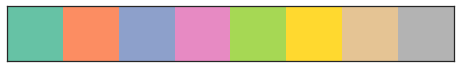

In [21]:
# seaborn palette -> 찾아보고 마음에 드는걸로 바꿔도 괜찮 !
palette = sns.color_palette('Set2') # palette 이름 () 안에 넣어주고
sns.palplot(palette) # 색상 확인
sns.set_palette('Set2') # 기본 palette로 적용됨

In [22]:
disabled_score=pd.read_csv("보행위험장애인지수.csv",encoding="cp949")

## 장애인 - 상권

In [23]:
market=pd.read_csv("행정동별_유통업체.csv",encoding="cp949")

In [24]:
disabled_market=pd.merge(disabled_score,market,on="행정동")
disabled_market

,행정동,보행취약장애인지수,유통업체수
0,가락1동,596,0
1,가락2동,1080,1
2,가락본동,860,0
3,가리봉동,651,0
4,가산동,908,5
...,...,...,...
419,효창동,362,0
420,후암동,849,0
421,휘경1동,626,1
422,휘경2동,1081,0


In [25]:
# 유통업체 0인 행정동 제거 (df_market)
df_market = disabled_market.drop(index = disabled_market[disabled_market['유통업체수']==0].index)
df_market = df_market.reset_index(drop=True)
df_market

,행정동,보행취약장애인지수,유통업체수
0,가락2동,1080,1
1,가산동,908,5
2,가양2동,2507,1
3,가양3동,1819,1
4,갈현2동,1413,1
...,...,...,...
232,황학동,578,3
233,회기동,357,1
234,회현동,367,9
235,휘경1동,626,1


In [26]:
# scaling
scaler = RobustScaler()
df_market_scale=pd.DataFrame(scaler.fit_transform(df_market[['보행취약장애인지수','유통업체수']]),columns=df_market[['보행취약장애인지수','유통업체수']].columns)
df_market_scale.insert(0, '행정동', df_market['행정동'])
df_market_scale

,행정동,보행취약장애인지수,유통업체수
0,가락2동,0.010896,0.0
1,가산동,-0.197337,4.0
2,가양2동,1.738499,0.0
3,가양3동,0.905569,0.0
4,갈현2동,0.414044,0.0
...,...,...,...
232,황학동,-0.596852,2.0
233,회기동,-0.864407,0.0
234,회현동,-0.852300,8.0
235,휘경1동,-0.538741,0.0


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


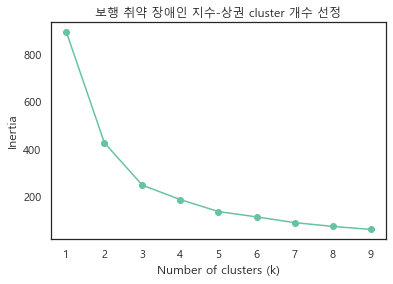

In [27]:
# elbow
data_market=df_market_scale.values
X=data_market[:,1:]
X
num_clusters = list(range(1,10))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('보행 취약 장애인 지수-상권 cluster 개수 선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 4

Text(0.5, 1.0, '보행 취약 장애인 지수와 상권 clustering')

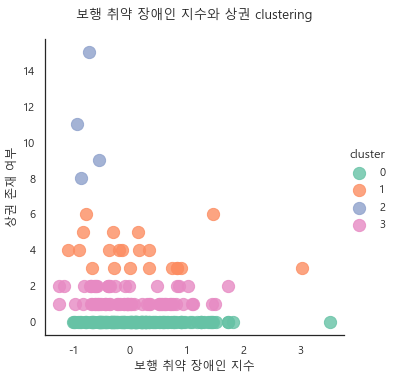

In [28]:
# clustering
kmeans = KMeans(n_clusters=4).fit(X)
kmeans.cluster_centers_
kmeans.labels_
df_market_scale['cluster'] = kmeans.labels_

sns.lmplot(x='보행취약장애인지수',y='유통업체수', data = df_market_scale, fit_reg=False, scatter_kws={"s":150},hue="cluster")
plt.xlabel('보행 취약 장애인 지수')
plt.ylabel('상권 존재 여부')
plt.title('보행 취약 장애인 지수와 상권 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

원하는 cluster 찾기가 쉽지 않아서 보행취약장애인지수 > 0 인 행정동 filter

In [29]:
df_market_scale_0 = df_market_scale[df_market_scale['보행취약장애인지수']>0]
df_market_scale_0 = df_market_scale_0.reset_index(drop=True)
df_market_scale_0

,행정동,보행취약장애인지수,유통업체수,cluster
0,가락2동,0.010896,0.0,0
1,가양2동,1.738499,0.0,0
2,가양3동,0.905569,0.0,0
3,갈현2동,0.414044,0.0,0
4,개봉2동,0.777240,0.0,0
...,...,...,...,...
113,행운동,0.203390,0.0,0
114,홍은1동,0.210654,0.0,0
115,화곡1동,1.731235,2.0,3
116,화곡4동,0.135593,0.0,0


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


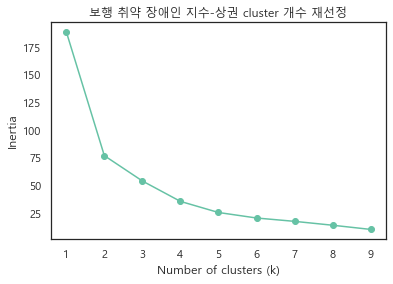

In [30]:
# elbow
data = df_market_scale_0.values
X=data[:,1:-1]

num_clusters = list(range(1,10))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('보행 취약 장애인 지수-상권 cluster 개수 재선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 4

Text(0.5, 1.0, '보행 취약 장애인 지수와 상권 2차 clustering')

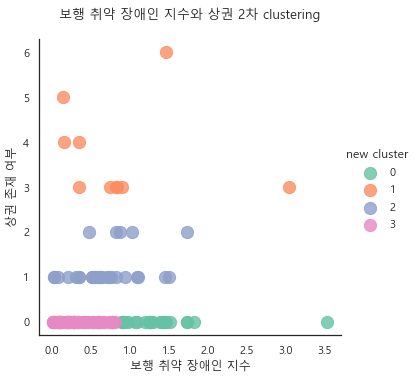

In [31]:
# clustering
kmeans = KMeans(n_clusters=4).fit(X)
kmeans.cluster_centers_
kmeans.labels_
df_market_scale_0['new cluster'] = kmeans.labels_

sns.lmplot(x='보행취약장애인지수',y='유통업체수', data = df_market_scale_0, fit_reg=False, scatter_kws={"s":150},hue="new cluster")
plt.xlabel('보행 취약 장애인 지수')
plt.ylabel('상권 존재 여부')
plt.title('보행 취약 장애인 지수와 상권 2차 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

cluster 1 (상권 존재 여부 >= 3) 선정이 적합해보임

### 선정 결과

In [32]:
result = df_market_scale_0[df_market_scale_0['new cluster']==1]
result

,행정동,보행취약장애인지수,유통업체수,cluster,new cluster
6,고척1동,0.347458,4.0,1,1
10,구로2동,0.830508,3.0,1,1
13,구로5동,0.345036,3.0,1,1
17,길음1동,0.162228,4.0,1,1
26,독산1동,1.472155,6.0,1,1
78,영등포동,0.139225,5.0,1,1
83,용신동,0.841404,3.0,1,1
99,전농1동,0.897094,3.0,1,1
100,제기동,0.743341,3.0,1,1
101,중계2.3동,3.037530,3.0,1,1


In [33]:
result.to_csv("보행취약장애인지수_상권_clustering.csv",encoding="cp949")